# 7. Conclusions

This notebook will show some conclusions in terms of accuracy and running time of the different models presented in previous notebooks. One more time, the dataset that we will use is [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package), available in Kaggle. It contains about 10 years of daily weather observations from many locations across Australia.

### Index:
1. [Packages required](#1.-Packages-required)
2. [Loading models](#2.-Loading-models)
3. [Best models comparison](#3.-Best-models-comparison)
4. [Models summary](#4.-Models-summary)

# 1. Packages required

In [ ]:
!pip install plotly

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# 2. Loading models

In [193]:
DT = pd.read_parquet('../data/models/cart.parquet')
BAG = pd.read_parquet('../data/models/bag.parquet')
RF = pd.read_parquet('../data/models/rf.parquet')
ET = pd.read_parquet('../data/models/et.parquet')
ADAB = pd.read_parquet('../data/models/adab.parquet')
GB = pd.read_parquet('../data/models/gb.parquet')
XGB = pd.read_parquet('../data/models/xgb.parquet')
LGBM = pd.read_parquet('../data/models/lgbm.parquet')
CATB = pd.read_parquet('../data/models/catb.parquet')

# 3. Best models comparison

According to the models that we built in previous notebooks, for each algorithm, we will select the model which maximizes the $Test\_Gini$ value and which have a $delta\%$ value smaller than $5\%$. Following this criterion we will select:
* From CART: $DT\_5$
* From Bagging: $Bag\_1000$, $RF\_1000$ and $ET\_1000$.
* From Booosting: $AdaB\_1000$, $GB\_50$, $XGB\_50$, $LGBM\_50$ and $CatB\_30$

In [22]:
metrics = {}
metrics['DT_5'] = dict(DT.iloc[2])
metrics['Bag_1000'] = dict(BAG.iloc[-1])
metrics['RF_1000'] = dict(RF.iloc[-1])
metrics['ET_1000'] = dict(ET.iloc[-1])
metrics['AdaB_1000'] = dict(ADAB.iloc[-1])
metrics['GB_50'] = dict(GB.iloc[7])
metrics['XGB_50'] = dict(XGB.iloc[7])
metrics['LGBM_50'] = dict(LGBM.iloc[7])
metrics['CatB_30'] = dict(CATB.iloc[6])

metrics_pd = pd.DataFrame.from_dict(metrics, orient = 'index', columns = ['Run_Time', 'Train_Gini', 'Test_Gini'])
metrics_pd

,Run_Time,Train_Gini,Test_Gini
DT_5,1.151289,0.655905,0.626416
Bag_1000,575.084719,0.695610,0.670582
RF_1000,86.533804,0.698128,0.673066
ET_1000,53.095737,0.655721,0.631647
AdaB_1000,291.471662,0.749872,0.734451
GB_50,38.503903,0.776301,0.744640
XGB_50,2.605901,0.775598,0.742928
LGBM_50,0.769436,0.777606,0.744632
CatB_30,3.714761,0.775832,0.741758


First, we will see how well are the predictions of the selected models. To show it, we will plot the $Test\_Gini$ of each model.

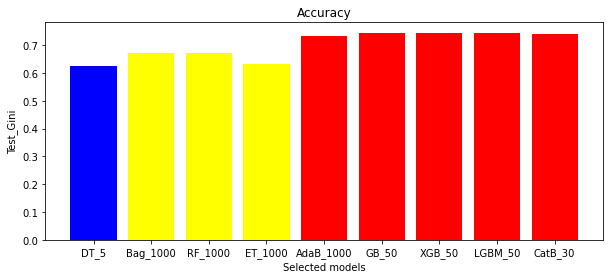

In [46]:
x = list(metrics_pd.index.values)
y = list(metrics_pd.Test_Gini)

plt.rcParams["figure.figsize"] = (10,4)
plt.bar(x, y, color = ['blue', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'red'])
plt.xlabel('Selected models')
plt.ylabel('Test_Gini')
plt.title('Accuracy')
plt.show()

Now, let's compare the running times obtained depending on the model.

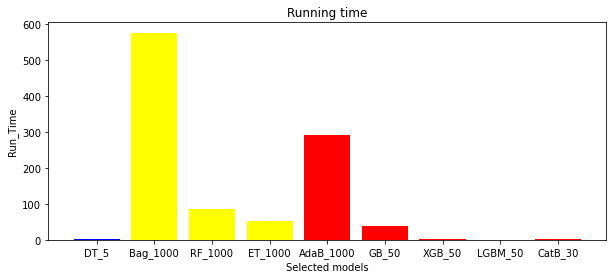

In [47]:
x = list(metrics_pd.index)
y = list(metrics_pd.Run_Time)

plt.rcParams["figure.figsize"] = (10,4)
plt.bar(x, y, color = ['blue', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'red'])
plt.xlabel('Selected models')
plt.ylabel('Run_Time')
plt.title('Running time')
plt.show()

# 4. Models summary

At this section, we will plot all models information in a simple plot to see the global results at a glance.

In [194]:
#In each dataframe, we generate two new columns:
index = [1, 3, 5, 10, 15, 20, 30, 50, 100, 200, 500, 1000]

BAG['Type'] = ['Bagging']*12
BAG['Estimators_number'] = index
BAG = BAG.reset_index()

RF['Type'] = ['Random Forest']*12
RF['Estimators_number'] = index
RF = RF.reset_index()

ET['Type'] = ['Extra-Trees']*12
ET['Estimators_number'] = index
ET = ET.reset_index()

ADAB['Type'] = ['AdaBoost']*12
ADAB['Estimators_number'] = index
ADAB = ADAB.reset_index()

GB['Type'] = ['Gradient Boosting']*12
GB['Estimators_number'] = index
GB = GB.reset_index()

XGB['Type'] = ['XGBoost']*12
XGB['Estimators_number'] = index
XGB = XGB.reset_index()

LGBM['Type'] = ['LightGBM']*12
LGBM['Estimators_number'] = index
LGBM = LGBM.reset_index()

CATB['Type'] = ['CatBoost']*12
CATB['Estimators_number'] = index
CATB = CATB.reset_index()

#We concatenate the dataframes to get the main dataframe which summarizes all the information:
models = pd.concat([BAG, RF, ET, ADAB, GB, XGB, LGBM, CATB], axis = 0)
models = models.reset_index().drop(['level_0', 'index'], axis = 1)

#We add a Time column that classifies the Run_Time values:
models['Time'] = np.where(models.Run_Time > 300, 7, 1)
models['Time'] = np.where((models.Run_Time > 120) & (models.Time == 1), 6, models.Time)
models['Time'] = np.where((models.Run_Time > 60) & (models.Time == 1), 5, models.Time)
models['Time'] = np.where((models.Run_Time > 30) & (models.Time == 1), 4, models.Time)
models['Time'] = np.where((models.Run_Time > 10) & (models.Time == 1), 3, models.Time)
models['Time'] = np.where((models.Run_Time > 1) & (models.Time == 1), 2, models.Time)

#Printing the final dataset:
models

,Run_Time,Train_Gini,Test_Gini,delta%,Type,Estimators_number,Time
0,0.827149,0.659598,0.633105,-4.016445,Bagging,1,1
1,2.288813,0.686585,0.656260,-4.416736,Bagging,3,2
2,4.037061,0.689631,0.658591,-4.500942,Bagging,5,2
3,7.211621,0.692725,0.669033,-3.420013,Bagging,10,2
4,10.945362,0.691592,0.667169,-3.531370,Bagging,15,3
...,...,...,...,...,...,...,...
91,5.259317,0.792454,0.749199,-5.458369,CatBoost,50,2
92,9.141006,0.821290,0.754821,-8.093263,CatBoost,100,2
93,24.907089,0.849800,0.778066,-8.441278,CatBoost,200,3
94,62.198822,0.856141,0.785529,-8.247777,CatBoost,500,5


In [195]:
fig = px.scatter(models, x = 'Estimators_number', y = 'Test_Gini', color = 'Type', size = 'Time', trendline = 'lowess')
fig.show()